# Предобработка данных

In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 557.5 MB 14 kB/s 
     |████████████████████████████████| 17.1 MB 41 kB/s 
     |████████████████████████████████| 1.7 MB 57.9 MB/s 
     |████████████████████████████████| 439 kB 54.3 MB/s 
     |████████████████████████████████| 5.7 MB 24.9 MB/s 
     |████████████████████████████████| 33.8 MB 240 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, train_test_split, TimeSeriesSplit
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool
import lightgbm as lgb
from sklearn import metrics
import pickle
import tensorflow as tf
from tensorflow import keras
from sklearn.pipeline import Pipeline

In [2]:
RANDOM_STATE = 12345

In [3]:
# Подключаю доступ к файлам данных для гугл драйв
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# Пути для гугл драйв
datasets_path = '/content/drive/MyDrive/Colab Notebooks/datasets/'
models_path = '/content/drive/MyDrive/Colab Notebooks/models/'

In [7]:
# Путь для локального запуска
#datasets_path = '../datasets/'
#models_path = '../application/models/'

In [5]:
# Чтение файлов с данными и их сохранение
x_bp = pd.read_excel(datasets_path + 'X_bp.xlsx', index_col=0)
x_nup = pd.read_excel(datasets_path + 'X_nup.xlsx', index_col=0)

# Получение информации о датафреймах
for data in (x_bp, x_nup):
    display(data.head())
    print('\n\n')
    display(data.info())
    print('\n\n')
    display(data.describe())

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  
0.0                    220.0  
1.0                    220.0  
2.0                    220.0  
3.0                    220.0  
4.0                    220.0




<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


None

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                    1023.000000              1023.000000  
mean                     2466.922843               218.423144  
std                       485.628006                59.735931  
min                      1036.856605                33.803026  
25%                      2135.850448               179.627520  
50%                      2459.524526               219.198882  
75%                      2767.193119               257.481724  
max                      3848.436732               414.590628

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0.0                 0.0          4.0               57.0
1.0                 0.0          4.0               60.0
2.0                 0.0          4.0               70.0
3.0                 0.0          5.0               47.0
4.0                 0.0          5.0               57.0




<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


None

Угол нашивки, град  Шаг нашивки  Плотность нашивки
count          1040.00000  1040.000000        1040.000000
mean             45.00000     6.911385          57.248399
std              45.02165     2.555181          12.332438
min               0.00000     0.000000           0.000000
25%               0.00000     5.102256          49.970740
50%              45.00000     6.938000          57.413594
75%              90.00000     8.587662          65.107235
max              90.00000    14.440522         103.988901

Проведя первый осмотр данных, мы видим, что типы данных в обоих датасетах - float64, пропусков нет. Однако количество строк в таблицах не одинаково - 1023 в x_bp и 1040 в x_nup.

Объеденяем таблицы по индексу, тип объединения INNER. При этом мы потеряем 17 строк из таблицы x_nup.

In [6]:
# объединяем датасеты
data = x_bp.join(x_nup, how='inner')
data.shape

(1023, 13)

Проведем предобработку данных. Проверим данные на наличие явных дубликатов.

In [7]:
data.duplicated().sum()

0

Дубликаты не обнаружены. 


Посмотрим на диаграммы рассения и тепловую карту.

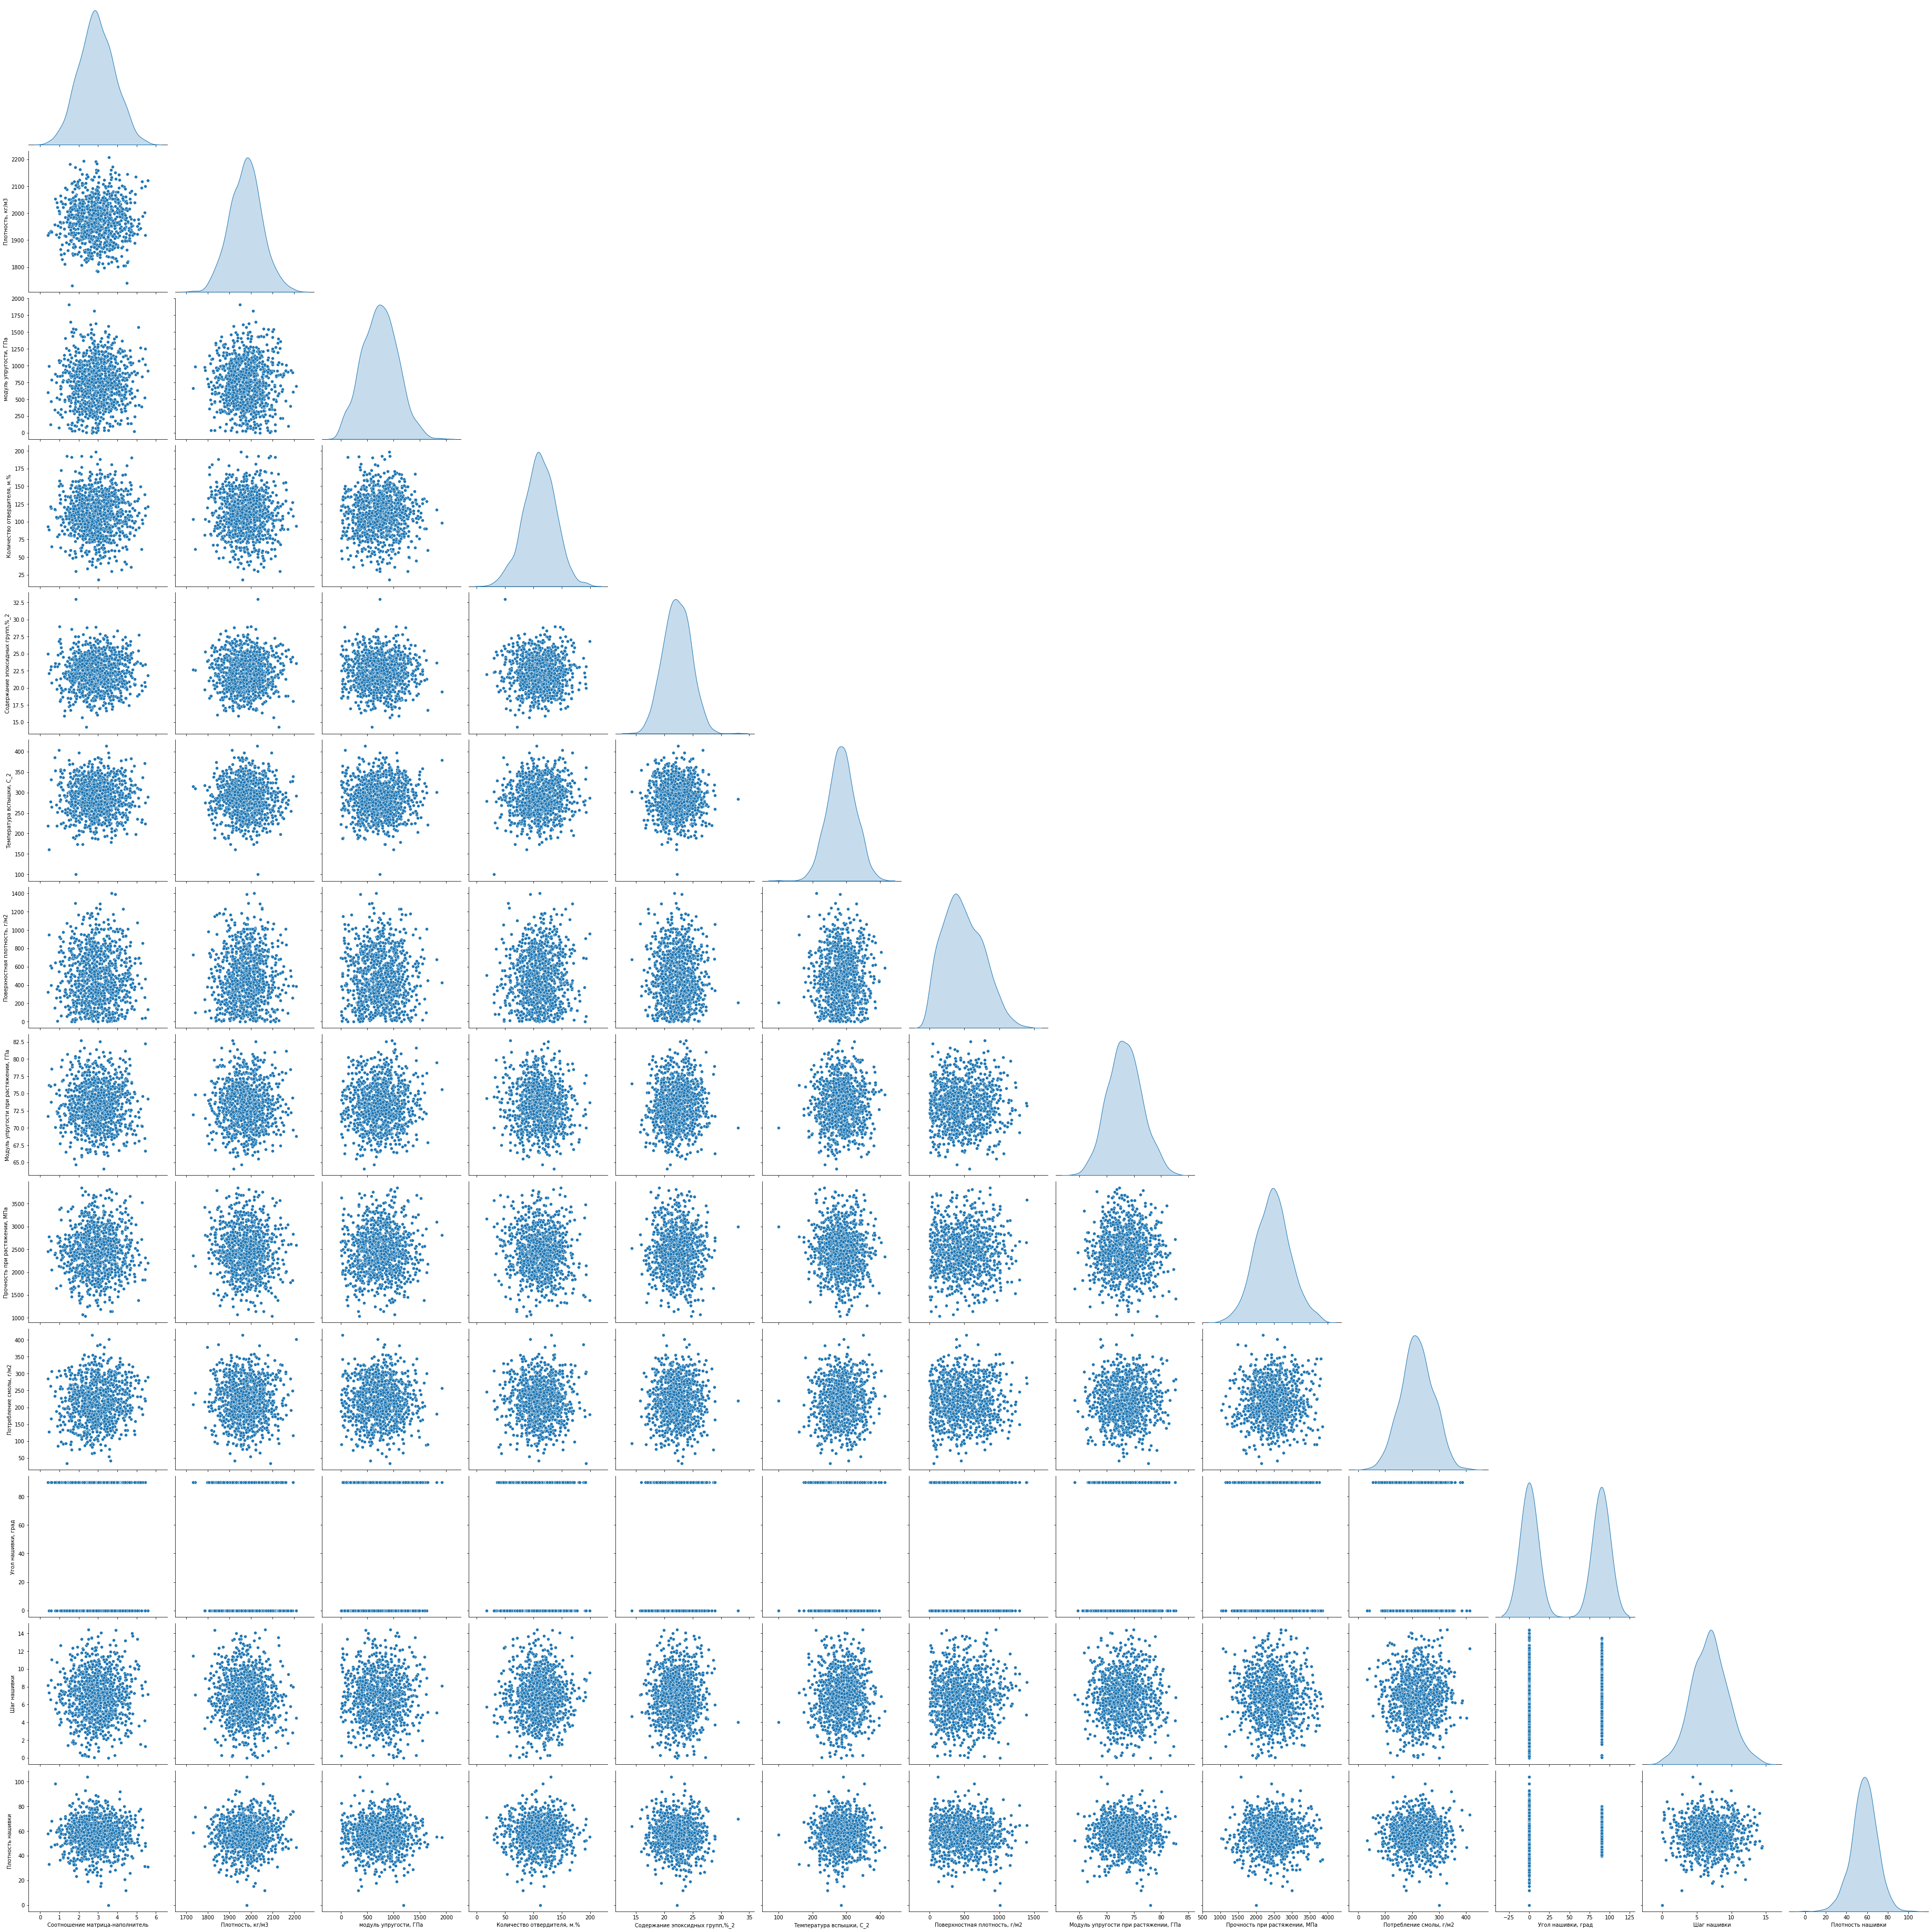

In [11]:
# Строим попарные диаграммы рассеяния
sns.pairplot(data, height=4, diag_kind='kde', corner = True);

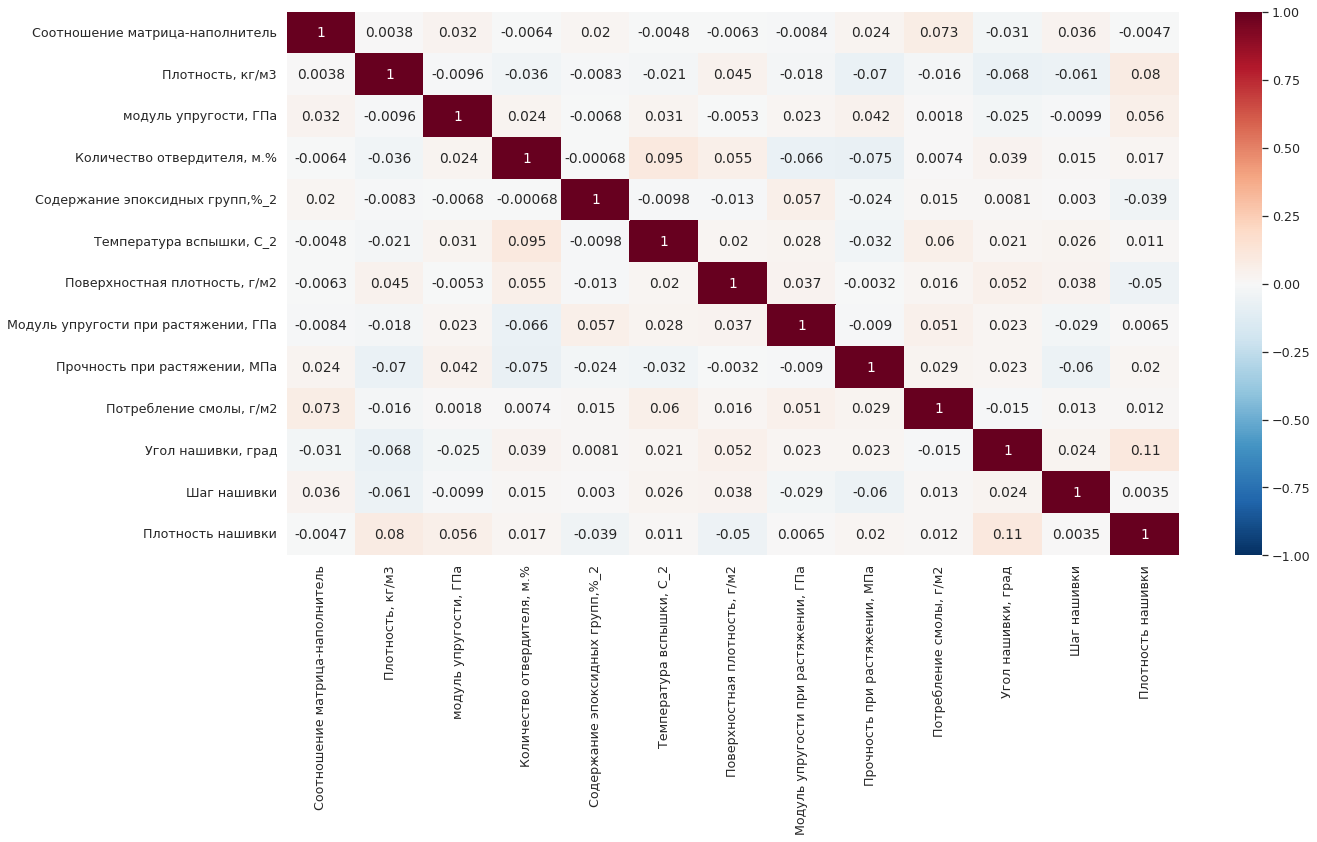

In [12]:
sns.set(font_scale=1.15)
plt.figure(figsize=(20, 10))
sns.heatmap(
    data.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1); 

Изучая данные графики, мы можем сказать, что линейная корреляция для признаков не обнаружена. Коэффициенты корреляции на тепловой карте, близкие к 0, показывают отсутствие линейной зависимости между признаками,  возможно, зависимость между признаками присутствует, но она более сложная.


Посмотрим на распределения данных в нашем датасете. Для этого построим гистограммы и боксплоты.

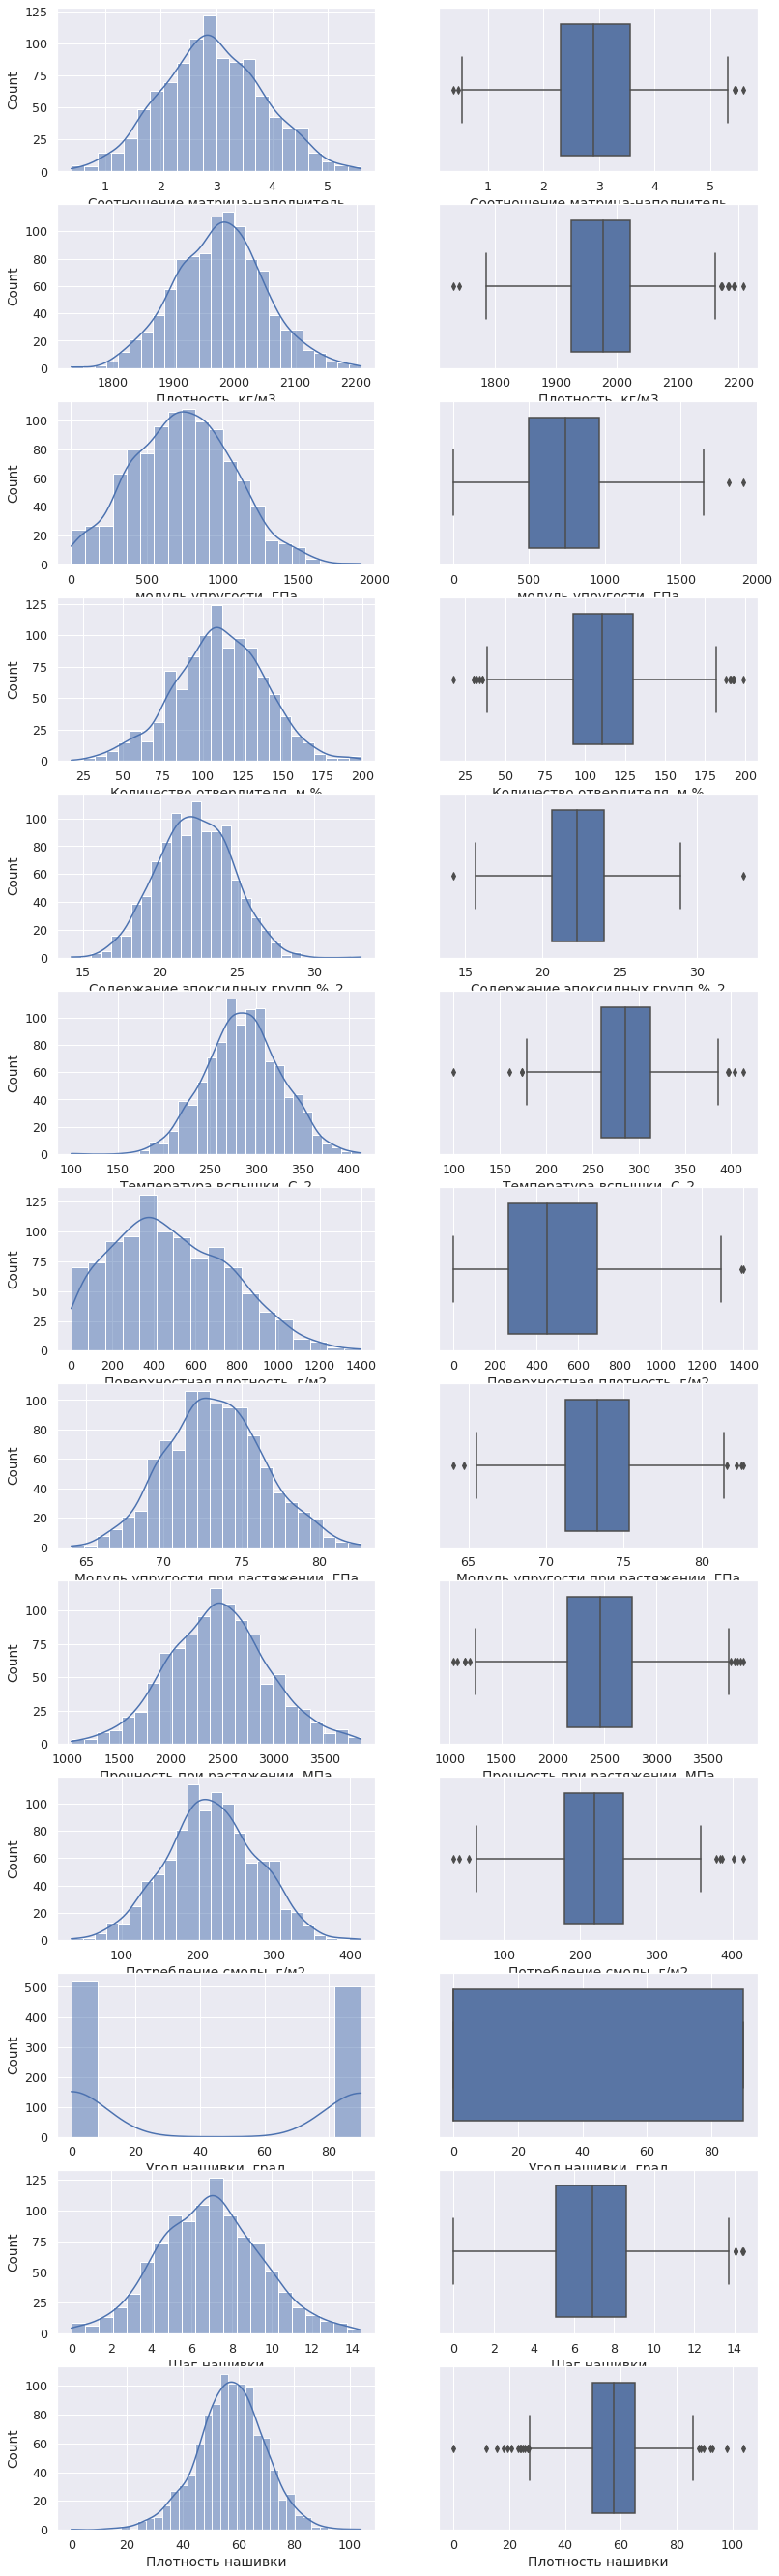

In [13]:
# строим графики распределения переменных и боксплоты
fig, axes = plt.subplots(13, 2, figsize=(12, 48))
for k, column in enumerate(data.columns):    
    sns.histplot(data=data, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=data, x=column, ax=axes[k, 1])
plt.show()

Анализируя полученные графики, можем сказать, что признаки (исключая  "Угол нашивки") имеют нормальное распределение и принимают неотрицательные значения.
Признак "Угол нашивки" принимает 2 значения - 0 и 90. Можем превобразовать признак в бинарный на этапе кодирования данных.

Боксплоты показывают нам на наличие выбросов в данных. Обработаем эти выбросы.

Мы выяснили, что распределения признаков близко к нормальному. Поэтому для обработки выбросов данных воспользуемся правилом трех сигм.

In [8]:
outliers = pd.DataFrame(index=data.index)
for column in data:
    zscore = (data[column] - data[column].mean()) / data[column].std()
    outliers[column] = (zscore.abs() > 3)
data = data[outliers.sum(axis=1)==0]
data.shape


(1000, 13)

In [8]:
data.shape

(1000, 13)



```
# Выбран кодовый формат
```

Оценка плотности ядра

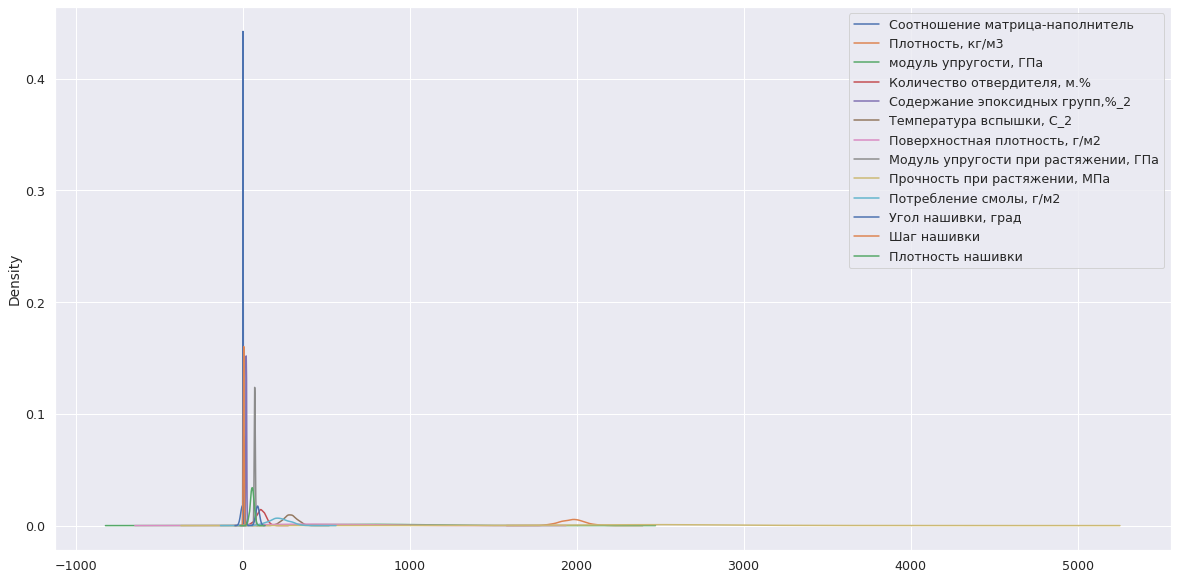

In [16]:
def plt_kde(data):
  fig, ax = plt.subplots(figsize=(20, 10))
  data.plot(kind='kde', ax=ax)
plt_kde(data)

## Выводы:

# Разработка и обучение модели

### Модель для модуля упругости при растяжении, ГПа

In [17]:
data.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
1.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   
5.0                         2.767918            2000.0             748.000000   
6.0                         2.569620            1910.0             807.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1.0                        50.00                        23.750000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   
5.0                       111.86                        22.267857   
6.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   
5.0                284.615385                          210.0   
6.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   
5.0                                  70.0                         3000.0   
6.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
1.0                    220.0                 0.0          4.0   
3.0                    220.0                 0.0          5.0   
4.0                    220.0                 0.0          5.0   
5.0                    220.0                 0.0          5.0   
6.0                    220.0                 0.0          5.0   

     Плотность нашивки  
1.0               60.0  
3.0               47.0  
4.0               57.0  
5.0               60.0  
6.0               70.0

In [18]:
features = data.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
target_1 = data['Модуль упругости при растяжении, ГПа']

target_2 = data['Прочность при растяжении, МПа']

In [19]:
# Разделяю на тренировочную и тестовую выборку
features_train, features_test, target_train_1, target_test_1 = train_test_split(features, target_1, test_size=0.25, random_state=RANDOM_STATE)
display(features_train.shape)
display(target_train_1.shape)
target_test_1.reset_index(drop=True, inplace=True)

features_train, features_test, target_train_2, target_test_2 = train_test_split(features, target_2, test_size=0.25, random_state=RANDOM_STATE)
display(features_train.shape)
display(target_train_2.shape)
target_test_2.reset_index(drop=True, inplace=True)

(750, 11)

(750,)

(750, 11)

(750,)

In [28]:
def get_metrics(model_name, target, predictions):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(target, predictions)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(target, predictions, squared=False)
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(target, predictions)
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(target, predictions)
    stat.loc[model_name, 'max_error'] = metrics.max_error(target, predictions)
    return stat

In [21]:
dummy_regressor_1 = DummyRegressor(strategy="mean")
dummy_regressor_1.fit(features_train, target_train_1)
dummy_predictions_1 = dummy_regressor_1.predict(features_test)
results_1 = get_metrics('dummy_regressor', target_test_1, dummy_predictions_1)

dummy_regressor_2 = DummyRegressor(strategy="mean")
dummy_regressor_2.fit(features_train, target_train_2)
dummy_predictions_2 = dummy_regressor_2.predict(features_test)
results_2 = get_metrics('dummy_regressor', target_test_2, dummy_predictions_2)

In [22]:
pipeline = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('lr', LinearRegression()),
    ]
)

parametrs = [
    {'lr__copy_X': [True, False]}
]

linear_regression_1 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
linear_regression_1.fit(features_train, target_train_1) 
display(linear_regression_1.best_params_)
display(linear_regression_1.best_score_)

linear_regression_2 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
linear_regression_2.fit(features_train, target_train_2) 
display(linear_regression_2.best_params_)
display(linear_regression_2.best_score_)

{'lr__copy_X': True}

0.002082624009906516

{'lr__copy_X': True}

-0.010139642493815678

In [23]:
lr_predictions_1 = linear_regression_1.predict(features_test)
results_1 = results_1.append(get_metrics('linear_regression', target_test_1, lr_predictions_1))

lr_predictions_2 = linear_regression_2.predict(features_test)
results_2 = results_2.append(get_metrics('linear_regression', target_test_2, lr_predictions_2))

In [24]:
pipeline = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('ridge', Ridge()),
    ]
)

parametrs = [
    {
        'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
        'ridge__alpha': range(10, 1510, 10)
        },
    {
        'ridge__solver': ['lbfgs'],
        'ridge__alpha': range(10, 1510, 10),
        'ridge__positive': [True]
        }
]

ridge_1 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
ridge_1.fit(features_train, target_train_1) 
display(ridge_1.best_params_)
display(ridge_1.best_score_)

ridge_2 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
ridge_2.fit(features_train, target_train_2) 
display(ridge_2.best_params_)
display(ridge_2.best_score_)

{'ridge__alpha': 10, 'ridge__solver': 'sparse_cg'}

0.005955894822003945

{'ridge__alpha': 10, 'ridge__solver': 'sparse_cg'}

-0.004386036768766625

In [25]:
ridge_predictions_1 = ridge_1.predict(features_test)
results_1 = results_1.append(get_metrics('ridge', target_test_1, ridge_predictions_1))

ridge_predictions_2 = ridge_2.predict(features_test)
results_2 = results_2.append(get_metrics('ridge', target_test_2, ridge_predictions_2))

In [26]:
pipeline = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('lasso', Lasso()),
    ]
)

parametrs = [
    {
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1], 
    } 
]

lasso_1 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
lasso_1.fit(features_train, target_train_1) 
display(lasso_1.best_params_)
display(lasso_1.best_score_)

lasso_2 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
lasso_2.fit(features_train, target_train_2) 
display(lasso_2.best_params_)
display(lasso_2.best_score_)

{'lasso__alpha': 0.01}

0.005608453144316239

{'lasso__alpha': 1}

-0.008306471451429634

In [27]:
lasso_predictions_1 = lasso_1.predict(features_test)
results_1 = results_1.append(get_metrics('lasso', target_test_1, lasso_predictions_1))

lasso_predictions_2 = lasso_2.predict(features_test)
results_2 = results_2.append(get_metrics('lasso', target_test_2, lasso_predictions_2))

In [28]:
pipeline = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('svr', SVR()),
    ]
)

parametrs = [
    {
      'svr__kernel': ['linear'],
      'svr__C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'svr__kernel': ['poly'],
      'svr__C': [0.001, 0.01, 0.02]
    },
    {
      'svr__kernel': ['rbf'],
      'svr__C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'svr__kernel': ['sigmoid'],
      'svr__C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }, 
]

svr_1 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
svr_1.fit(features_train, target_train_1) 
display(svr_1.best_params_)
display(svr_1.best_score_)


svr_2 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
svr_2.fit(features_train, target_train_2) 
display(svr_2.best_params_)
display(svr_2.best_score_)

{'svr__C': 0.001, 'svr__kernel': 'poly'}

0.004543906743827171

{'svr__C': 0.5, 'svr__kernel': 'sigmoid'}

-0.005173131489243514

In [29]:
svr_predictions_1 = svr_1.predict(features_test)
results_1 = results_1.append(get_metrics('svr', target_test_1, svr_predictions_1))

svr_predictions_2 = svr_2.predict(features_test)
results_2 = results_2.append(get_metrics('svr', target_test_2, svr_predictions_2))

In [30]:
pipeline = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('knr', KNeighborsRegressor()),
    ]
)

parametrs = [
    {
      'knr__n_neighbors': range(3, 31, 2)
    } 
]

knr_1 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
knr_1.fit(features_train, target_train_1) 
display(knr_1.best_params_)
display(knr_1.best_score_)


knr_2 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
knr_2.fit(features_train, target_train_2) 
display(knr_2.best_params_)
display(knr_2.best_score_)

{'knr__n_neighbors': 29}

-0.01876415653229598

{'knr__n_neighbors': 29}

-0.031020223493765764

In [31]:
knr_predictions_1 = knr_1.predict(features_test)
results_1 = results_1.append(get_metrics('knr', target_test_1, knr_predictions_1))

knr_predictions_2 = knr_2.predict(features_test)
results_2 = results_2.append(get_metrics('knr', target_test_2, knr_predictions_2))

In [32]:
pipeline = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('dtr', DecisionTreeRegressor(random_state=RANDOM_STATE)),
    ]
)

parametrs = [
    {
      'dtr__splitter': ['best', 'random'],
      'dtr__max_features': range(1, 11),
      'dtr__max_depth': range(1, 21),
    } 
]

dtr_1 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
dtr_1.fit(features_train, target_train_1) 
display(dtr_1.best_params_)
display(dtr_1.best_score_)

dtr_2 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
dtr_2.fit(features_train, target_train_2) 
display(dtr_2.best_params_)
display(dtr_2.best_score_)

{'dtr__max_depth': 1, 'dtr__max_features': 1, 'dtr__splitter': 'random'}

-0.0037561810653206074

{'dtr__max_depth': 1, 'dtr__max_features': 4, 'dtr__splitter': 'best'}

-0.0009278257609938168

In [33]:
dtr_predictions_1 = dtr_1.predict(features_test)
results_1 = results_1.append(get_metrics('dtr', target_test_1, dtr_predictions_1))

dtr_predictions_2 = dtr_2.predict(features_test)
results_2 = results_2.append(get_metrics('dtr', target_test_2, dtr_predictions_2))

In [34]:
pipeline = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('rfr', RandomForestRegressor(random_state=RANDOM_STATE)),
    ]
)

parametrs = [
    {
      'rfr__n_estimators': range(50, 201, 50), 
      'rfr__max_depth': range(1, 15),
      'rfr__max_features': range(1, 11),
    } 
]

rfr_1 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
rfr_1.fit(features_train, target_train_1) 
display(rfr_1.best_params_)
display(rfr_1.best_score_)


rfr_2 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
rfr_2.fit(features_train, target_train_2) 
display(rfr_2.best_params_)
display(rfr_2.best_score_)

{'rfr__max_depth': 2, 'rfr__max_features': 3, 'rfr__n_estimators': 50}

0.0014324663641504716

{'rfr__max_depth': 11, 'rfr__max_features': 2, 'rfr__n_estimators': 150}

0.010767238487466524

In [35]:
rfr_predictions_1 = rfr_1.predict(features_test)
results_1 = results_1.append(get_metrics('rfr', target_test_1, rfr_predictions_1))


rfr_predictions_2 = rfr_2.predict(features_test)
results_2 = results_2.append(get_metrics('rfr', target_test_2, rfr_predictions_2))

In [36]:
catboost_1 = CatBoostRegressor(loss_function='RMSE', random_state=RANDOM_STATE)
cat_params = {
    'depth': [5, 10], 
    'learning_rate': np.arange(0.1, 1, 0.2),
    }
catboost_grid_1 = catboost_1.grid_search(cat_params, Pool(features_train, target_train_1), cv=TimeSeriesSplit(n_splits=8), verbose=True)

catboost_2 = CatBoostRegressor(loss_function='RMSE', random_state=RANDOM_STATE)
catboost_grid_2 = catboost_2.grid_search(cat_params, Pool(features_train, target_train_2), cv=TimeSeriesSplit(n_splits=8), verbose=True)

Выходные данные были обрезаны до нескольких последних строк (5000).
24:	learn: 344.7104017	test: 495.8786855	best: 493.8886513 (23)	total: 51.9ms	remaining: 2.02s
25:	learn: 341.0046310	test: 495.2844182	best: 493.8886513 (23)	total: 53.8ms	remaining: 2.02s
26:	learn: 336.2088040	test: 497.0278228	best: 493.8886513 (23)	total: 55.7ms	remaining: 2.01s
27:	learn: 331.5650186	test: 498.3559307	best: 493.8886513 (23)	total: 57.7ms	remaining: 2s
28:	learn: 328.7573343	test: 496.3754315	best: 493.8886513 (23)	total: 59.6ms	remaining: 2s
29:	learn: 326.0325137	test: 496.0346837	best: 493.8886513 (23)	total: 61.5ms	remaining: 1.99s
30:	learn: 324.5876005	test: 495.4668788	best: 493.8886513 (23)	total: 63.6ms	remaining: 1.99s
31:	learn: 322.7235130	test: 495.3803877	best: 493.8886513 (23)	total: 65.5ms	remaining: 1.98s
32:	learn: 321.5772897	test: 495.0616089	best: 493.8886513 (23)	total: 67.4ms	remaining: 1.98s
33:	learn: 317.7838979	test: 496.5179407	best: 493.8886513 (23)	total: 69.4ms	remai

In [37]:
display(catboost_grid_1['params'])
display(catboost_grid_2['params'])

{'depth': 5, 'learning_rate': 0.1}

{'depth': 5, 'learning_rate': 0.30000000000000004}

In [38]:
catboost_final_1 = CatBoostRegressor(depth=catboost_grid_1['params']['depth'], 
                                   learning_rate=catboost_grid_1['params']['learning_rate'],
                                   loss_function='RMSE', verbose=100)
catboost_final_1.fit(Pool(features_train, target_train_1))

catboost_final_2 = CatBoostRegressor(depth=catboost_grid_2['params']['depth'], 
                                   learning_rate=catboost_grid_2['params']['learning_rate'],
                                   loss_function='RMSE', verbose=100)
catboost_final_2.fit(Pool(features_train, target_train_2))

0:	learn: 3.1187350	total: 2.01ms	remaining: 2s
100:	learn: 2.3569544	total: 183ms	remaining: 1.63s
200:	learn: 1.8392633	total: 367ms	remaining: 1.46s
300:	learn: 1.4268296	total: 556ms	remaining: 1.29s
400:	learn: 1.1264613	total: 760ms	remaining: 1.13s
500:	learn: 0.9000695	total: 975ms	remaining: 971ms
600:	learn: 0.7319756	total: 1.15s	remaining: 762ms
700:	learn: 0.5855782	total: 1.33s	remaining: 569ms
800:	learn: 0.4730090	total: 1.51s	remaining: 376ms
900:	learn: 0.3853437	total: 1.72s	remaining: 189ms
999:	learn: 0.3125620	total: 1.92s	remaining: 0us
0:	learn: 475.7347385	total: 2.12ms	remaining: 2.12s
100:	learn: 215.1542964	total: 183ms	remaining: 1.63s
200:	learn: 107.7955533	total: 361ms	remaining: 1.44s
300:	learn: 58.1901173	total: 533ms	remaining: 1.24s
400:	learn: 34.4375735	total: 718ms	remaining: 1.07s
500:	learn: 19.4690320	total: 914ms	remaining: 910ms
600:	learn: 11.0653573	total: 1.09s	remaining: 725ms
700:	learn: 6.7674142	total: 1.28s	remaining: 547ms
800:	lear

In [39]:
catboost_predictions_1 = catboost_final_1.predict(features_test)
results_1 = results_1.append(get_metrics('catboost', target_test_1, catboost_predictions_1))

catboost_predictions_2 = catboost_final_2.predict(features_test)
results_2 = results_2.append(get_metrics('catboost', target_test_2, catboost_predictions_2))

In [40]:
pipeline = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('lgbm', lgb.LGBMRegressor()),
    ]
)

parametrs = [
    {
        'lgbm__num_leaves':[31, 100, 200], 
        'lgbm__learning_rate':[0.1, 0.3, 0.5],
    }
]

lgbm_1 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
lgbm_1.fit(features_train, target_train_1) 
display(lgbm_1.best_params_)
display(lgbm_1.best_score_)

lgbm_2 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
lgbm_2.fit(features_train, target_train_2) 
display(lgbm_2.best_params_)
display(lgbm_2.best_score_)

{'lgbm__learning_rate': 0.1, 'lgbm__num_leaves': 31}

-0.24964122841800584

{'lgbm__learning_rate': 0.1, 'lgbm__num_leaves': 31}

-0.13953905508915576

In [41]:
lgbm_predictions_1 = lgbm_1.predict(features_test)
results_1 = results_1.append(get_metrics('lgbm', target_test_1, lgbm_predictions_1))

lgbm_predictions_2 = lgbm_2.predict(features_test)
results_2 = results_2.append(get_metrics('lgbm', target_test_2, lgbm_predictions_2))

In [42]:
pipeline = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('gbr', GradientBoostingRegressor(random_state=RANDOM_STATE)),
    ]
)

parametrs = [
    {
        'gbr__loss': ['squared_error', 'absolute_error'], 
        'gbr__n_estimators': [50, 100, 150],
        'gbr__max_depth': [1, 2, 3],
        'gbr__max_features': [1, 2, 5, 11],
    }
]

gbr_1 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
gbr_1.fit(features_train, target_train_1) 
display(gbr_1.best_params_)
display(gbr_1.best_score_)

gbr_2 = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametrs, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1
)
gbr_2.fit(features_train, target_train_2) 
display(gbr_2.best_params_)
display(gbr_2.best_score_)

{'gbr__loss': 'absolute_error',
 'gbr__max_depth': 1,
 'gbr__max_features': 5,
 'gbr__n_estimators': 50}

-0.00035948664251680046

{'gbr__loss': 'squared_error',
 'gbr__max_depth': 2,
 'gbr__max_features': 1,
 'gbr__n_estimators': 50}

0.013064598263368551

In [43]:
gbr_predictions_1 = gbr_1.predict(features_test)
results_1 = results_1.append(get_metrics('gbr', target_test_1, gbr_predictions_1))

gbr_predictions_2 = gbr_2.predict(features_test)
results_2 = results_2.append(get_metrics('gbr', target_test_2, gbr_predictions_2))

In [44]:
display(results_1)

display(results_2)

R2      RMSE       MAE      MAPE  max_error
dummy_regressor   -0.004036  3.052892  2.463833  0.033723   9.159206
linear_regression -0.027923  3.088995  2.498601  0.034196   8.733386
ridge             -0.013398  3.067093  2.478443  0.033920   8.865129
lasso             -0.014245  3.068374  2.477739  0.033912   8.899312
svr               -0.004368  3.053397  2.466900  0.033778   8.981321
knr               -0.043621  3.112491  2.511645  0.034383   8.619261
dtr               -0.004052  3.052917  2.463877  0.033724   9.158813
rfr               -0.009565  3.061287  2.466319  0.033751   9.112006
catboost          -0.205467  3.345142  2.692858  0.036816   9.461555
lgbm              -0.169878  3.295392  2.616058  0.035757   9.868853
gbr               -0.010713  3.063027  2.478294  0.033933   8.852253

R2        RMSE         MAE      MAPE    max_error
dummy_regressor   -0.000354  497.415096  385.693931  0.172664  1425.668631
linear_regression -0.036405  506.298770  399.029498  0.176525  1386.349118
ridge             -0.020680  502.443149  394.279111  0.175026  1385.486336
lasso             -0.026818  503.951672  396.274695  0.175689  1384.647916
svr               -0.001087  497.597435  385.807793  0.172221  1418.711630
knr               -0.020638  502.432849  395.623664  0.176149  1451.614910
dtr               -0.018310  501.859389  387.371770  0.173459  1413.536032
rfr               -0.024930  503.488044  396.013842  0.176199  1426.954893
catboost          -0.206094  546.176072  432.798954  0.192129  1640.488442
lgbm              -0.135702  529.997996  412.111379  0.182783  1575.283923
gbr                0.001306  497.002154  387.459996  0.172412  1410.583328

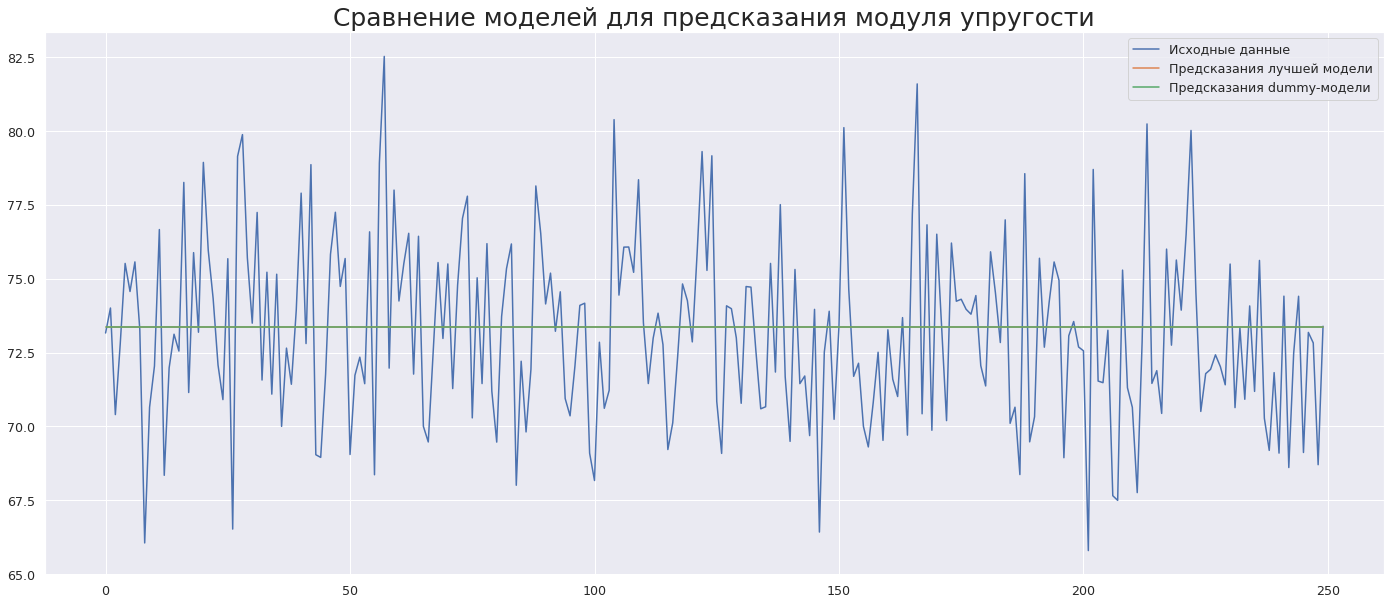

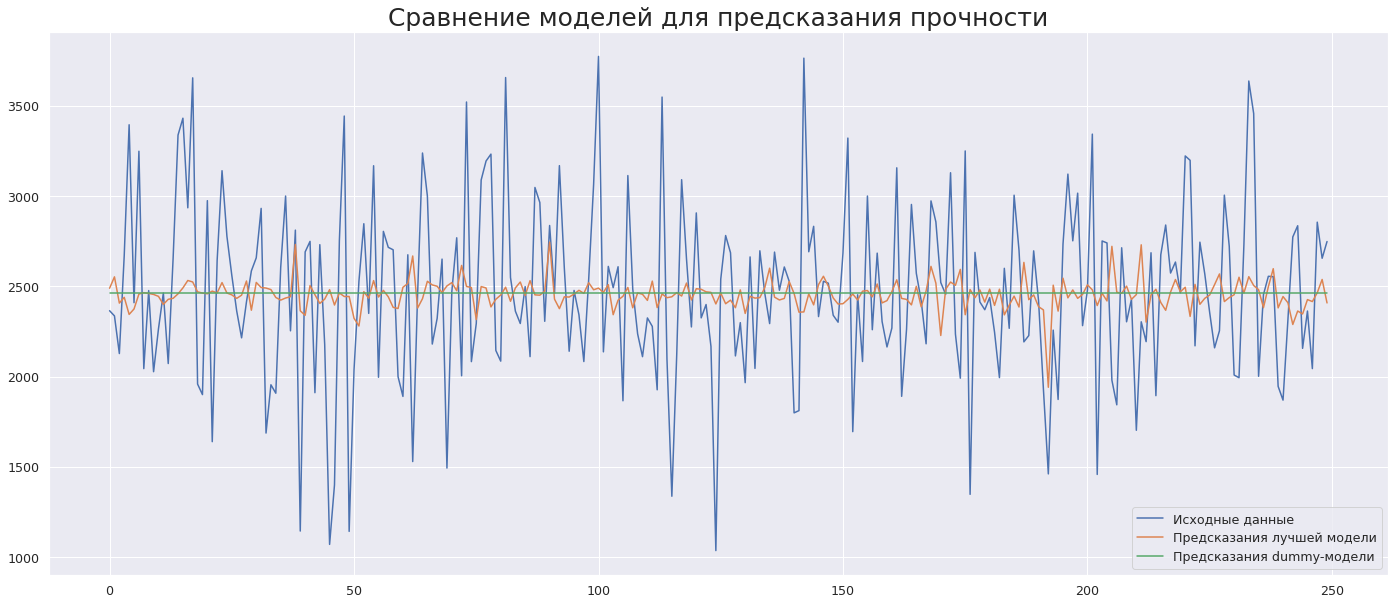

In [45]:
# Визуализация
fig, ax = plt.subplots(figsize=(24, 10))
ax.plot(target_test_1, label='Исходные данные')
ax.plot(dtr_predictions_1, label='Предсказания лучшей модели')
ax.plot(dummy_predictions_1, label='Предсказания dummy-модели')
ax.legend()
plt.title('Сравнение моделей для предсказания модуля упругости', fontsize=25)
plt.show()

fig, ax = plt.subplots(figsize=(24, 10))
ax.plot(target_test_2, label='Исходные данные')
ax.plot(gbr_predictions_2, label='Предсказания лучшей модели')
ax.plot(dummy_predictions_2, label='Предсказания dummy-модели')
ax.legend()
plt.title('Сравнение моделей для предсказания прочности', fontsize=25)
plt.show()

Сохранение моделей для дальнейшего использования в приложении

In [46]:
def save_object_with_pickle(obj, obj_name):
  filename = models_path + obj_name
  file = open(filename, 'wb')
  pickle.dump(obj, file)
  file.close()

In [47]:
def load_object_with_pickle(obj_name):
  filename = models_path + obj_name
  file = open(filename, 'rb')
  obj = pickle.load(file)
  file.close()
  return obj

In [48]:
save_object_with_pickle(dtr_1, 'best_model_1')
save_object_with_pickle(gbr_2, 'best_model_2')

In [49]:
best_model_1 = load_object_with_pickle('best_model_1')
best_model_2 = load_object_with_pickle('best_model_2')

## Соотношение матрица-наполнитель

In [9]:
features = data.drop(['Соотношение матрица-наполнитель'], axis=1)
target = data['Соотношение матрица-наполнитель']

In [10]:
features_train_raw, features_test_raw, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)
display(features_train_raw.shape)
display(target_train.shape)

target_test.reset_index(drop=True, inplace=True)

(750, 12)

(750,)

In [11]:
scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train_raw)
features_test = scaler.transform(features_test_raw)

features_train = pd.DataFrame(features_train, columns=features_train_raw.columns)
features_test = pd.DataFrame(features_test, columns=features_test_raw.columns)

In [22]:
features_train = np.array(features_train)
target_train = np.array(target_train)

features_test = np.array(features_test)
target_test = np.array(target_test)

In [29]:
dummy_regressor_3 = DummyRegressor(strategy="mean")
dummy_regressor_3.fit(features_train, target_train)
dummy_predictions_3 = dummy_regressor_3.predict(features_test)

In [13]:
# Функция, собирающая нейросеть заданной архитектуры
def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [14]:
# Функция, компилирующая нейросеть с заданными параметрами
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model

In [15]:
# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [48]:
# Собираю нейросеть
model_1 = construct_model()

In [49]:
# Компилирую нейросеть
model_1 = compile_model(model_1)

In [50]:
# Сводная информация по архитектуре сети
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
 dense_6 (Dense)             (None, 24)                600       
                                                                 
 dense_7 (Dense)             (None, 24)               

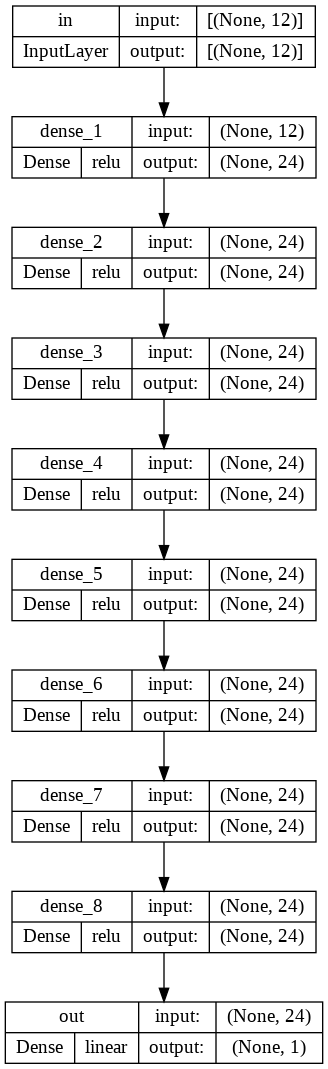

In [51]:
# Архитектура нейросети визуально
keras.utils.plot_model(model_1, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [52]:
%%time
#Обучение нейросети
history = model_1.fit(
  features_train, 
  target_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
17/17 [==============================] - 5s 32ms/step - loss: 96.1551 - root_mean_squared_error: 3.0121 - val_loss: 88.3203 - val_root_mean_squared_error: 2.8081
Epoch 2/50
17/17 [==============================] - 0s 12ms/step - loss: 69.5340 - root_mean_squared_error: 2.3692 - val_loss: 35.5943 - val_root_mean_squared_error: 1.3506
Epoch 3/50
17/17 [==============================] - 0s 14ms/step - loss: 34.3363 - root_mean_squared_error: 1.0913 - val_loss: 31.6559 - val_root_mean_squared_error: 1.1386
Epoch 4/50
17/17 [==============================] - 0s 11ms/step - loss: 31.0103 - root_mean_squared_error: 1.1345 - val_loss: 30.5049 - val_root_mean_squared_error: 0.9664
Epoch 5/50
17/17 [==============================] - 0s 13ms/step - loss: 30.2609 - root_mean_squared_error: 1.0204 - val_loss: 30.3644 - val_root_mean_squared_error: 1.0099
Epoch 6/50
17/17 [==============================] - 0s 14ms/step - loss: 29.7541 - root_mean_squared_error: 1.0303 - val_loss: 30.4184 

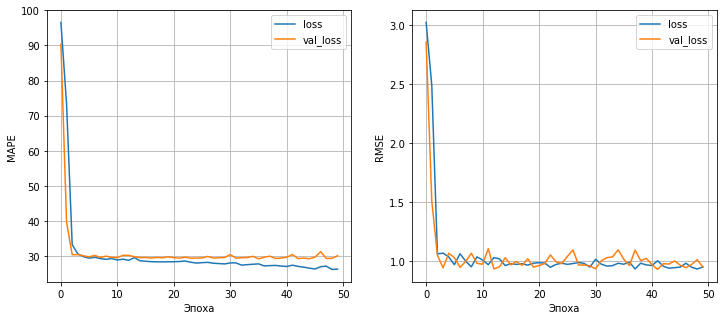

In [21]:
plot_loss(history.history)

In [53]:
# Проверяем точность нейросети на тестовых данных
model_1.evaluate(features_test, target_test)

8/8 [==============================] - 0s 4ms/step - loss: 31.8282 - root_mean_squared_error: 0.9797


[31.82823371887207, 0.9797282218933105]

In [54]:
# Предсказание 
model_1_pred = model_1.predict(features_test)

8/8 [==============================] - 0s 4ms/step


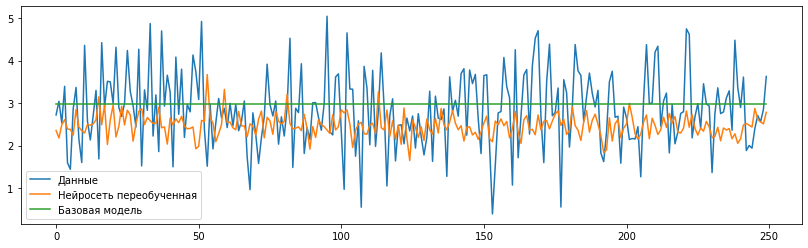

In [55]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(target_test, label='Данные')
ax.plot(model_1_pred, label='Нейросеть переобученная')
ax.plot(dummy_predictions_3, label='Базовая модель')
ax.legend()
plt.show()

Ранняя остановка процесса обучения для борьбы с переобучением

In [31]:
# Создаем модель с той же архитектурой
model_2 = construct_model()
model_2 = compile_model(model_2)

In [33]:
%%time
#Обучение нейросети
history = model_2.fit(
  features_train, 
  target_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Epoch 1/50
17/17 [==============================] - 4s 19ms/step - loss: 90.7423 - root_mean_squared_error: 2.8856 - val_loss: 74.8869 - val_root_mean_squared_error: 2.4794
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 49.3164 - root_mean_squared_error: 1.8129 - val_loss: 34.9519 - val_root_mean_squared_error: 0.9875
Epoch 3/50
17/17 [==============================] - 0s 9ms/step - loss: 32.4821 - root_mean_squared_error: 1.0259 - val_loss: 32.5720 - val_root_mean_squared_error: 1.1917
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 31.1152 - root_mean_squared_error: 1.1205 - val_loss: 32.4221 - val_root_mean_squared_error: 0.9630
Epoch 5/50
17/17 [==============================] - 0s 9ms/step - loss: 30.8286 - root_mean_squared_error: 1.0348 - val_loss: 30.9010 - val_root_mean_squared_error: 1.0254
Epoch 6/50
17/17 [==============================] - 0s 8ms/step - loss: 29.8134 - root_mean_squared_error: 1.0161 - val_loss: 31.1592 - val

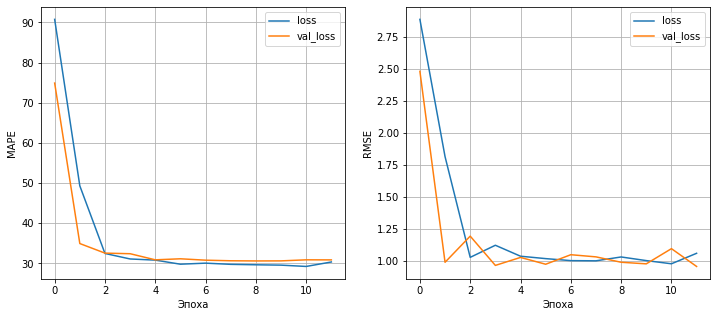

In [34]:
plot_loss(history.history)

In [35]:
# Проверяем точность нейросети на тестовых данных
model_2.evaluate(features_test, features_test)

8/8 [==============================] - 2s 8ms/step - loss: 125651832.0000 - root_mean_squared_error: 2.3633


[125651832.0, 2.363266706466675]

In [36]:
# Предсказание 
model_2_pred = model_2.predict(features_test)

8/8 [==============================] - 0s 2ms/step


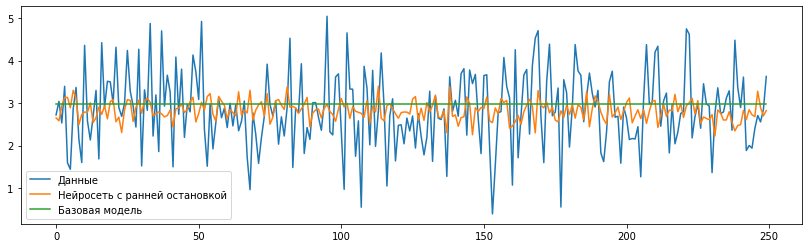

In [37]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(target_test, label='Данные')
ax.plot(model_2_pred, label='Нейросеть с ранней остановкой')
ax.plot(dummy_predictions_3, label='Базовая модель')
ax.legend()
plt.show()

Добавление Dropout-слоя

In [38]:
# Построение аналогичной модели с Dropout слоем
model_3 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dropout(0.05, name='dropout_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dropout(0.05, name='dropout_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dropout(0.05, name='dropout_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dropout(0.05, name='dropout_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dropout(0.05, name='dropout_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dropout(0.05, name='dropout_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [39]:
# Компиляция модели
model_3 = compile_model(model_3)

In [40]:
# Архитектура изменилась
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_4 (Dense)             (None, 24)               

In [41]:
%%time
#Обучение нейросети
history = model_3.fit(
  features_train, 
  target_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
17/17 [==============================] - 4s 21ms/step - loss: 98.8838 - root_mean_squared_error: 3.0803 - val_loss: 96.7410 - val_root_mean_squared_error: 3.0171
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 93.7207 - root_mean_squared_error: 2.9517 - val_loss: 87.2837 - val_root_mean_squared_error: 2.7827
Epoch 3/50
17/17 [==============================] - 0s 13ms/step - loss: 71.1440 - root_mean_squared_error: 2.4004 - val_loss: 34.6939 - val_root_mean_squared_error: 1.3357
Epoch 4/50
17/17 [==============================] - 0s 14ms/step - loss: 35.0620 - root_mean_squared_error: 1.1765 - val_loss: 30.6215 - val_root_mean_squared_error: 1.1187
Epoch 5/50
17/17 [==============================] - 0s 15ms/step - loss: 31.9781 - root_mean_squared_error: 1.1708 - val_loss: 29.6754 - val_root_mean_squared_error: 1.0231
Epoch 6/50
17/17 [==============================] - 0s 16ms/step - loss: 32.8231 - root_mean_squared_error: 1.1357 - val_loss: 30.6426 -

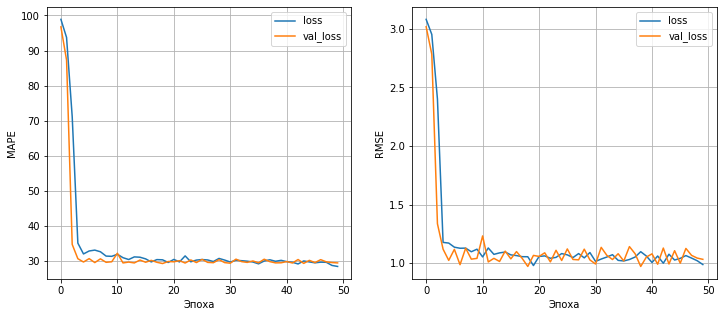

In [42]:
plot_loss(history.history)

In [44]:
# Проверяем точность нейросети на тестовых данных
model_3.evaluate(features_test, target_test)

8/8 [==============================] - 0s 3ms/step - loss: 32.4875 - root_mean_squared_error: 0.9861


[32.48751449584961, 0.9860612750053406]

In [45]:
# Предсказание 
model_3_pred = model_3.predict(features_test)

8/8 [==============================] - 0s 2ms/step


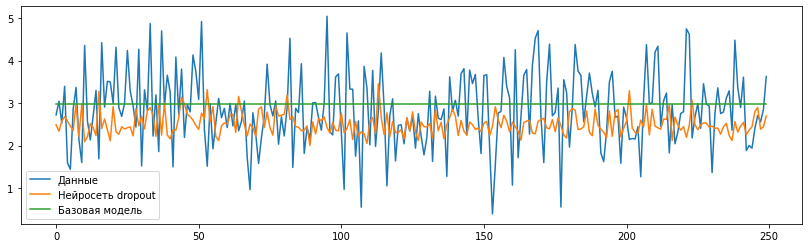

In [46]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(target_test, label='Данные')
ax.plot(model_3_pred, label='Нейросеть dropout')
ax.plot(dummy_predictions_3, label='Базовая модель')
ax.legend()
plt.show()

In [56]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
results_3 = get_metrics('DummyRegressor', target_test, dummy_predictions_3)
results_3 = results_3.append(get_metrics('Нейросеть переобученная', target_test, model_1_pred))
results_3 = results_3.append(get_metrics('Нейросеть с ранней остановкой', target_test, model_2_pred))
results_3 = results_3.append(get_metrics('Нейросеть dropout', target_test, model_3_pred))
results_3

R2      RMSE       MAE      MAPE  \
DummyRegressor                -0.020151  0.882319  0.686249  0.341972   
Нейросеть переобученная       -0.257839  0.979728  0.775280  0.318282   
Нейросеть с ранней остановкой -0.030224  0.886664  0.688314  0.323383   
Нейросеть dropout             -0.274153  0.986061  0.779692  0.324875   

                               max_error  
DummyRegressor                  2.577898  
Нейросеть переобученная         2.679286  
Нейросеть с ранней остановкой   2.342318  
Нейросеть dropout               2.624417